In [1]:
import numpy as np
import easy21env as easy21
import easy21_table
import pandas as pd
import random
import easy21_table
from numba import njit
from numba import jit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline  
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 10)

N0 = 100

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
q = easy21_table.create_q()
q_N = easy21_table.create_q()
q_sum_reward = easy21_table.create_q()

In [23]:
@njit
def episode(q, q_N, q_sum_reward):
    for i in range(10000000):
        player_card = easy21.take(0)
        dealer_card = easy21.take(0)
        player_score = player_card[0]
        rewards = [] 
        player_scores = [player_score]
        terminal = False
        actions = []
        dealer_score = dealer_card[0]
        while terminal == False:
            
            # Choose action based on epsilon greedy policy
            hit_N = easy21_table.get_q(q_N, dealer_score, player_score, 1)
            stick_N = easy21_table.get_q(q_N, dealer_score, player_score, 0)
            total_S_N = hit_N + stick_N
            epsilon = N0 / (N0 + total_S_N)
            if random.random() < epsilon: 
                action = 1 if random.random() > 0.5  else 0 
            else:
                action = np.argmax(q[dealer_score, player_score, :])
                
            # Play round 
            dealer_card, player_score, terminal, reward = easy21.step(dealer_card, player_score, action)
            rewards.append(reward)
            actions.append(action)
            terminal = terminal 
            
            #Update player scores in non-terminal state.
            if terminal == False:
                player_score = player_score 
                player_scores.append(player_score)
                
        expected_future_reward = 0
        for i in range(len(player_scores) - 1, 0, -1):
            expected_future_reward += rewards[i] 
            q_N = easy21_table.set_q(q_N, dealer_score, player_score, actions[i],
                               easy21_table.get_q(q_N, dealer_score, player_score, actions[i]) + 1)
            q_sum_reward = easy21_table.set_q(q_sum_reward, dealer_score, player_score, actions[i], 
                               easy21_table.get_q(q_sum_reward, dealer_score, player_score, actions[i]) + reward)
            q = easy21_table.set_q(q, dealer_score, player_score, actions[i],
                                   easy21_table.get_q(q_sum_reward, dealer_score, player_score, actions[i]) / 
                                   easy21_table.get_q(q_N, dealer_score, player_score, actions[i]))
    return q, q_N, q_sum_reward

In [25]:
q, q_N, q_sum_reward = episode(q, q_N, q_sum_reward)

0.0021073039153706747
0.01304631441617743
0.005446919766871834
0.002106061244260983
0.01589067217543302
0.009958175662218682
0.006018657839301836
0.015073861923424782
0.006818491749624983
0.0043465032381449125
0.006011421701232342
0.012484394506866416
0.0045854732208363905
0.015069318866787222
0.011327594019030359
0.0068073519400953025
0.10672358591248667
0.002095601332802448
0.012567550584391102
0.005381262444169402
0.005672149744753261
0.009910802775024777
0.016608536787908985
0.009067005168192945
0.005669577049552103
0.028401022436807723
0.0027597626604112047
0.009594166746618057
0.010075566750629723
0.10672358591248667
0.0020490123760347513
0.009584052137243627
0.0067865626060400405
0.005508731339172589
0.004773041859577109
0.011318619128466326
0.005692167577413479
0.006316720358789716
0.009877518767285659
0.002725686873092019
0.005830563815520961
0.006515931452401121
0.003944461975386557
0.0063155235569028675
0.004277342914581462
0.004764173415912339
0.005321696556862328
0.0120714

0.020907380305247754
0.015039855617386072
0.009229349330872173
0.015225334957369063
0.011091393078970719
0.0050753692331117085
0.006206554121151936
0.009078529278256923
0.004283205551034394
0.011865211200759373
0.002687016337059329
0.006014314067480604
0.0034071550255536627
0.012067093037287318
0.005838052425710783
0.013700506918755994
0.011682242990654205
0.009607070804111826
0.0034020548411240388
0.005420054200542005
0.012112403100775194
0.004336889582791222
0.0033980087668626187
0.005106469897359955
0.008648274669203494
0.004963764519011218
0.0037096116036650965
0.1059322033898305
0.0018889665464024632
0.005465376837732962
0.005960896518836433
0.005082850462539392
0.01720282126268708
0.0047431579945928
0.00546477949614733
0.005463883728554256
0.006124448799608035
0.029394473838918283
0.015644555694618274
0.005468066491688539
0.003381348481774532
0.01725625539257981
0.005542929992794191
0.013522650439486139
0.012532898859506203
0.01725327812284334
0.005028916268544128
0.0026647480480

0.022930520522815866
0.009121590805436468
0.0057984460164675865
0.005857544517338332
0.014289797084881395
0.005793071486502144
0.005750761975961815
0.0035129628328532283
0.005690224194833276
0.005162089613875697
0.023255813953488372
0.004533297066956797
0.003123243175713661
0.008928571428571428
0.004946576968737634
0.0049458430189425785
0.012371644191513051
0.002418145765826764
0.0048216007714561235
0.005175447676223993
0.026831231553528307
0.019223375624759707
0.027754648903691368
0.012756729174639622
0.004697261496547513
0.0067254018427601045
0.005673115107505532
0.01461347362268011
0.005723770820216359
0.009116601331023794
0.02218770800976259
0.010956502684343158
0.0120598166907863
0.001838235294117647
0.005755064456721915
0.0024539275109813257
0.09624639076034648
0.0025244238002675888
0.09624639076034648
0.041390728476821195
0.0018977492693665313
0.0023195936072000186
0.0038368568468710434
0.005715918833952558
0.005574446736161436
0.006723593088146305
0.018504811250925242
0.0119274

In [26]:
z = np.zeros((30, 11))
x, y = np.meshgrid(range(1,22), range(1,11))

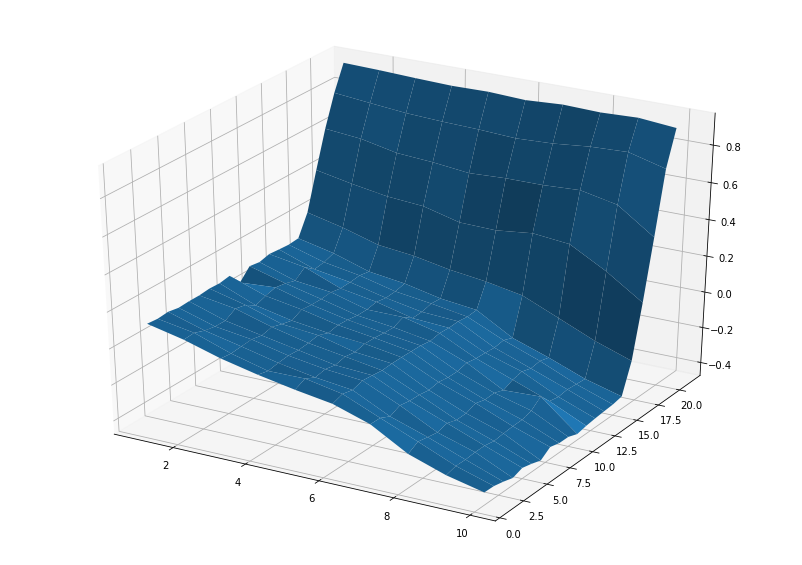

In [27]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(y, x , q[:,:,0])

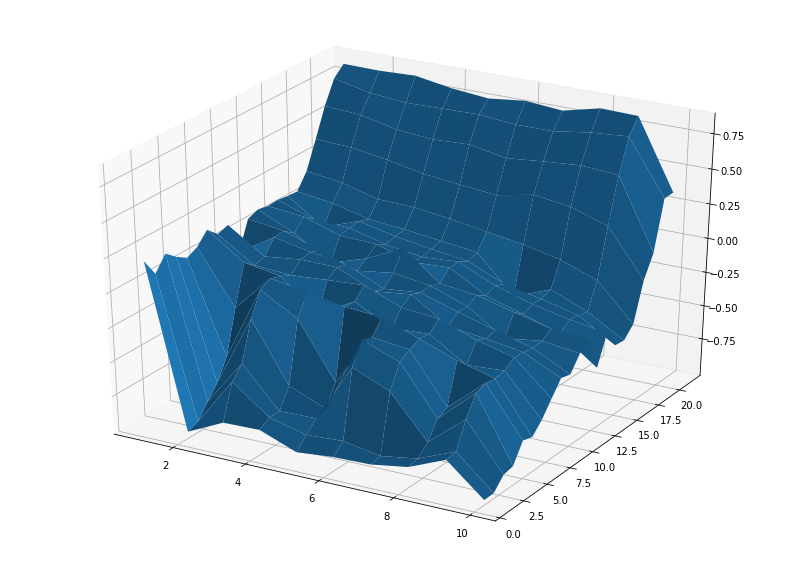

In [28]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(y, x , q[:,:,1])